<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

Képek letöltése

In [4]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/rdr2.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/Magnus.jpg

--2024-10-07 15:01:16--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/rdr2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110288 (108K) [image/png]
Saving to: ‘rdr2.png.2’

rdr2.png.2          100%[===================>] 107.70K  --.-KB/s    in 0.004s  

2024-10-07 15:01:16 (27.3 MB/s) - ‘rdr2.png.2’ saved [110288/110288]

--2024-10-07 15:01:16--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/DeepLearning/KHF1-imgs/Magnus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10641 

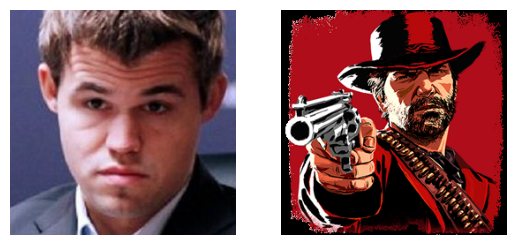

In [9]:
# képek beolvasása
img1 = cv2.imread("Magnus.jpg")
img2 = cv2.imread("rdr2.png")

# BGR-ből RGB-be konvertálás
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# kép megjelenítése
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.imshow(img2)

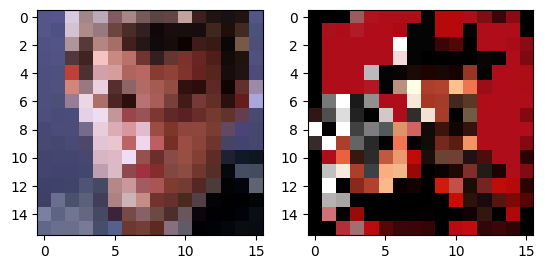

In [7]:
icon_size = (16, 16)
icon1 = cv2.resize(img1, icon_size)
icon2 = cv2.resize(img2, icon_size)

plt.subplot(1, 2, 1)
plt.imshow(icon1)
plt.subplot(1, 2, 2)
plt.imshow(icon2)